In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
import math

In [ ]:
def prediccion(y_test,y_pred):
  validos=0
  no_validos=0
  for i in range(len(y_pred)):
    if y_test.iloc[i]==y_pred[i].astype(int):
      validos=validos+1
    else:
      no_validos=no_validos+1
  return(print("Validos: ",validos," / No validos: ",no_validos))

In [ ]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Matriz de confusión")
    plt.ylabel('Realidad')
    plt.xlabel('Predicción')
    plt.show()
    print()
    print(classification_report(y_test, pred_y))

In [ ]:
df = pd.read_csv('movies_list_2012-2020.csv')

In [ ]:
df.head()
df_models_opening_week=df_models_opening_week=pd.DataFrame()

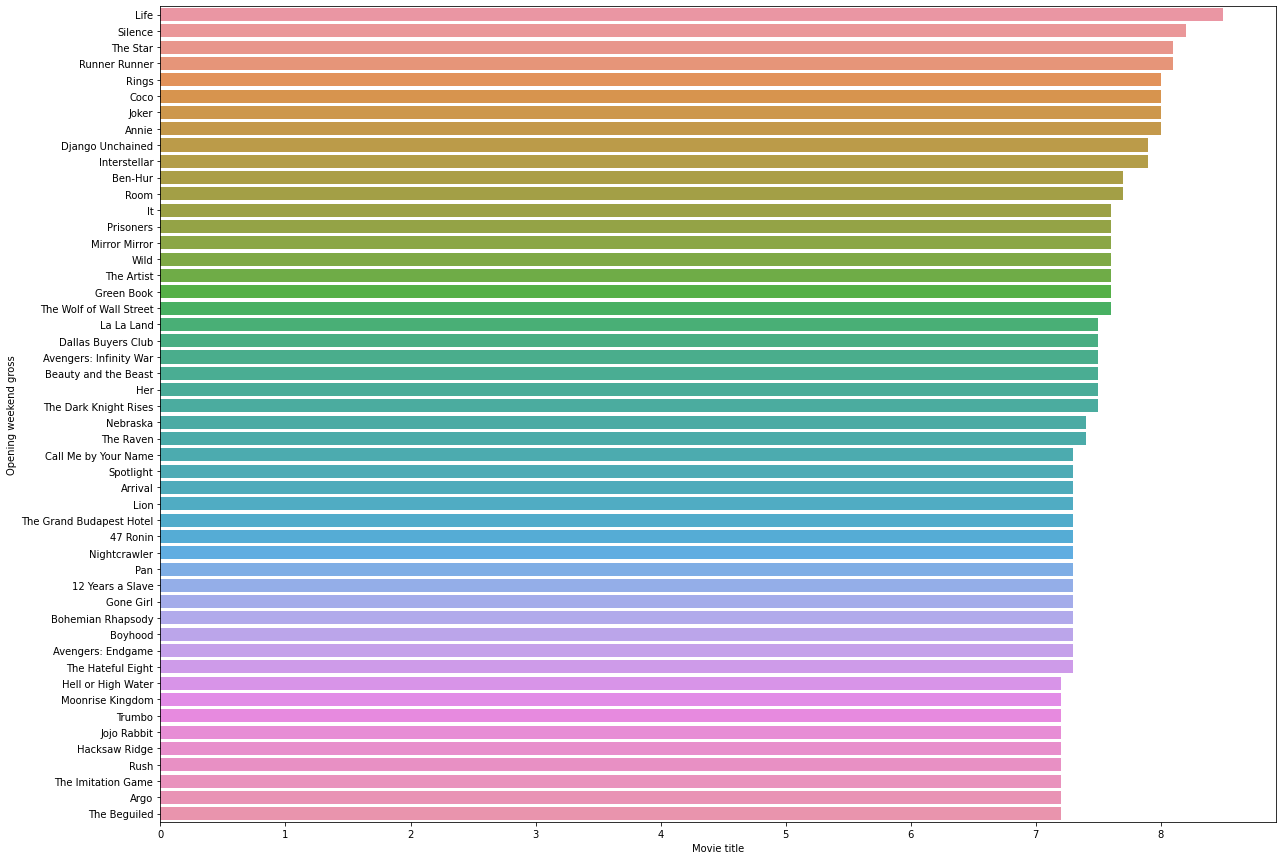

In [ ]:
# TOP 50 movies opening weekend
top_movies_opening_weekend = df[["movie_title", "score"]].sort_values(by="score", ascending=False)
top_movies_opening_weekend[:50]

plt.figure(figsize=(20, 15))
sns.barplot(
    y = "movie_title",
    x = "score",
    data = top_movies_opening_weekend[:50]
)
plt.ylabel("Opening weekend gross")
plt.xlabel("Movie title")

plt.show()

# Pre-analysis

In [ ]:
df = df.drop(columns=['release_date', 'movie_title'], axis=0)
df_original=df

## Differents values

In [ ]:
df['max_theaters'].describe()

count     947.000000
mean     2818.786695
std       971.671773
min       600.000000
25%      2233.000000
50%      3003.000000
75%      3517.000000
max      4802.000000
Name: max_theaters, dtype: float64

In [ ]:
df['score'].describe()

count    947.000000
mean       5.605385
std        0.981683
min        2.500000
25%        4.900000
50%        5.600000
75%        6.300000
max        8.500000
Name: score, dtype: float64

In [ ]:
df['running_time_min'].describe()

count    947.000000
mean     109.280887
std       19.235364
min        4.000000
25%       96.000000
50%      107.000000
75%      121.000000
max      207.000000
Name: running_time_min, dtype: float64

In [ ]:
for col in df.columns.to_list():
  if col.startswith('genre_'):
    print(f'{col}: {df[col].value_counts()[1]}/{len(df)}')

genre_action: 251/947
genre_adventure: 144/947
genre_animation: 83/947
genre_comedy: 330/947
genre_documentary: 6/947
genre_drama: 325/947
genre_fantasy: 150/947
genre_film_noir: 5/947
genre_horror: 107/947
genre_kids: 28/947
genre_musical: 20/947
genre_mystery: 46/947
genre_romance: 95/947
genre_sci-fi: 139/947
genre_tv_series: 3/947
genre_thriller: 215/947
genre_war: 22/947
genre_western: 9/947


## Outliers

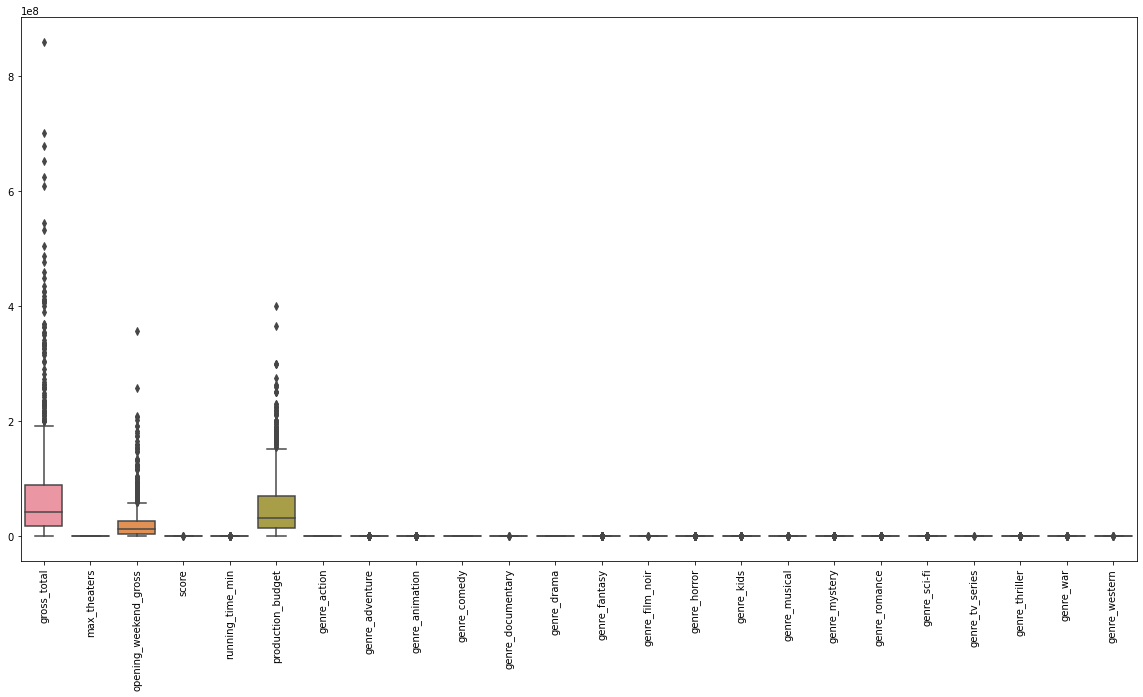

In [ ]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=df)
_ = ax.set_xticklabels(df.keys(), rotation=90)

## Correlation

In [ ]:
df.head()

,gross_total,max_theaters,opening_weekend_gross,score,running_time_min,production_budget,genre_action,genre_adventure,genre_animation,genre_comedy,...,genre_horror,genre_kids,genre_musical,genre_mystery,genre_romance,genre_sci-fi,genre_tv_series,genre_thriller,genre_war,genre_western
0,623357910,4349,207438708,3.0,89,225000000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,448139099,4404,160887295,7.5,164,230000000,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,408010692,4137,152535747,6.2,143,80000000,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,304360277,3526,88364714,6.6,143,200000000,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,303003568,4100,84617303,7.0,170,200000000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


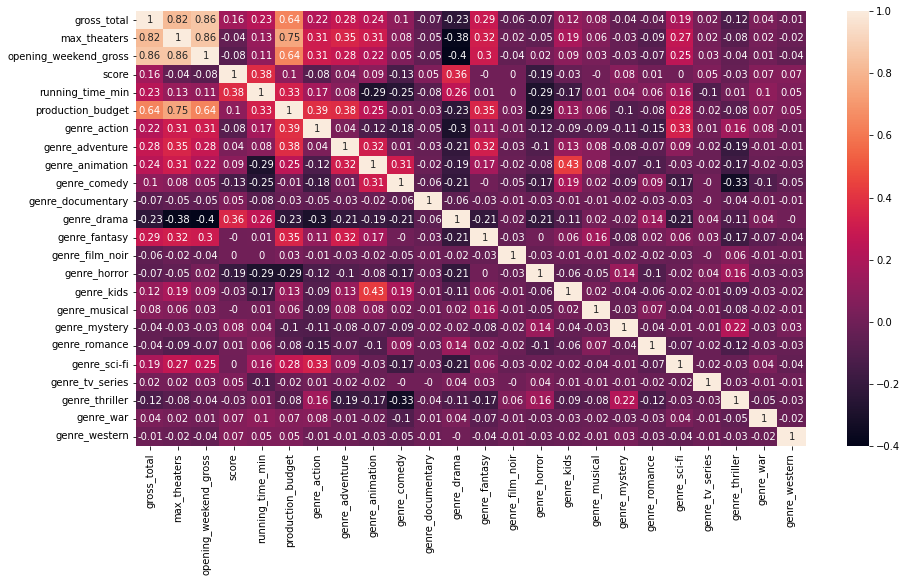

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(round(df.corr(method='spearman'), 2), annot=True, mask=None)
plt.show()

# Models

1. Predict Score (without total gross)
2. Total gross (without score)
3. Opening weekend gross (without total gross and score)

In [ ]:
from sklearn.model_selection import train_test_split

## Predict opening weekend gross



### Logistic Regression

In [ ]:
df["opening_weekend_gross"].describe()

count    9.470000e+02
mean     2.314766e+07
std      3.373209e+07
min      2.284900e+04
25%      4.701990e+06
50%      1.275030e+07
75%      2.647275e+07
max      3.571150e+08
Name: opening_weekend_gross, dtype: float64

In [ ]:
df.loc[df["opening_weekend_gross"] <  4.712085e+06, "opening_weekend_gross"] = 0
df.loc[(df["opening_weekend_gross"] >= 4.712085e+06) & (df["opening_weekend_gross"] < 1.135465e+07), "opening_weekend_gross"] = 1
df.loc[(df["opening_weekend_gross"] >=1.135465e+07) & (df["opening_weekend_gross"] < 2.261790e+07), "opening_weekend_gross"] = 2
df.loc[(df["opening_weekend_gross"] >=2.261790e+07), "opening_weekend_gross"] = 3

In [ ]:
df["opening_weekend_gross"].value_counts()

3    284
0    238
2    222
1    203
Name: opening_weekend_gross, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
y=df["opening_weekend_gross"]
cols = list(df.columns)
scaler = MinMaxScaler()

df= scaler.fit_transform(df)
df = pd.DataFrame(df, columns=cols)

In [ ]:
df.head()

,gross_total,max_theaters,opening_weekend_gross,score,running_time_min,production_budget,genre_action,genre_adventure,genre_animation,genre_comedy,...,genre_horror,genre_kids,genre_musical,genre_mystery,genre_romance,genre_sci-fi,genre_tv_series,genre_thriller,genre_war,genre_western
0,0.726068,0.892194,1.0,0.083333,0.418719,0.562391,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.521834,0.905283,1.0,0.833333,0.788177,0.574894,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.475060,0.841742,1.0,0.616667,0.684729,0.199800,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.354246,0.696335,1.0,0.683333,0.684729,0.499875,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.352665,0.832937,1.0,0.750000,0.817734,0.499875,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_log = df.drop(columns=['score', 'gross_total','opening_weekend_gross'])
X = df_log
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000,multi_class="multinomial").fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [ ]:
score = clf.score(X_test, y_test)
print(score)
df_models_opening_week=df_models_opening_week=df_models_opening_week=df_models_opening_week.append({'name_model': 'Logistic Regression', 'score': round(score*100,2),'target': 'opening_weekend_gross'},ignore_index=True)

0.6368421052631579


In [ ]:
prediccion(y_test,y_pred)

Validos:  121  / No validos:  69


### Random Forest Classifier


In [ ]:
rfc = RandomForestClassifier(n_estimators=2000,criterion="gini")
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
score = rfc.score(X_test, y_test)
print(score)
df_models_opening_week=df_models_opening_week.append({'name_model': 'Random Forest Classifier', 'score':round(score*100,2),'target': 'opening_weekend_gross'},ignore_index=True)

0.6894736842105263


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfc))

Accuracy: 0.6894736842105263


In [ ]:
prediccion(y_test,y_pred_rfc)

Validos:  131  / No validos:  59


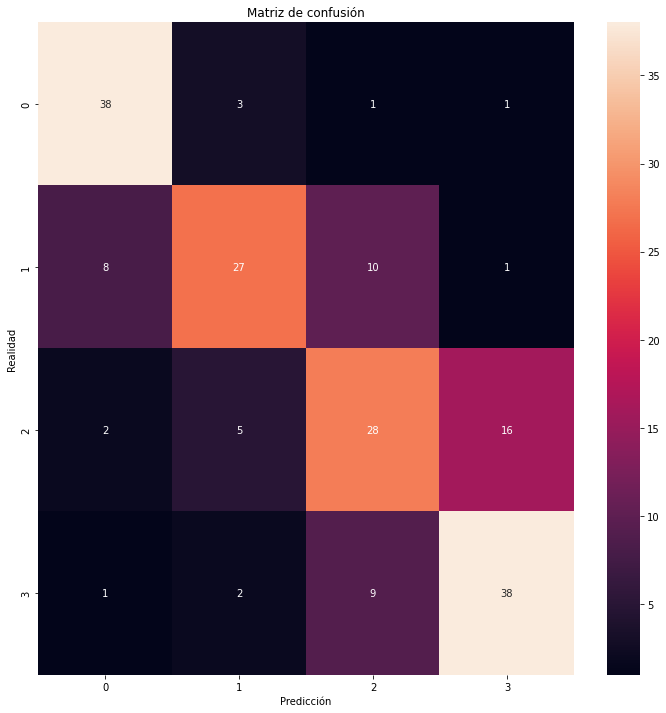


              precision    recall  f1-score   support

           0       0.78      0.88      0.83        43
           1       0.73      0.59      0.65        46
           2       0.58      0.55      0.57        51
           3       0.68      0.76      0.72        50

    accuracy                           0.69       190
   macro avg       0.69      0.69      0.69       190
weighted avg       0.69      0.69      0.68       190



In [ ]:
mostrar_resultados(y_test,y_pred_rfc)

### Decision Tree Classifier

In [ ]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=10,splitter="best")   
#Entrenamos
clf = dtc.fit(X_train, y_train)

In [ ]:
y_pred_dtc=dtc.predict(X_test)

In [ ]:
score=dtc.score(X_test,y_test)
df_models_opening_week=df_models_opening_week.append({'name_model': 'Decision Tree Classifier', 'score':round(score*100,2),'target': 'opening_weekend_gross'},ignore_index=True)

In [ ]:
prediccion(y_test,y_pred_dtc)

Validos:  116  / No validos:  74


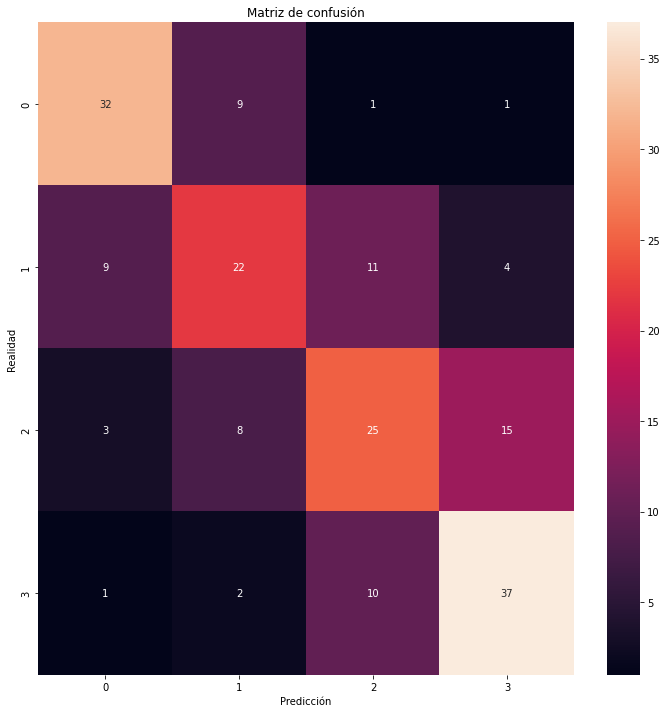


              precision    recall  f1-score   support

           0       0.71      0.74      0.73        43
           1       0.54      0.48      0.51        46
           2       0.53      0.49      0.51        51
           3       0.65      0.74      0.69        50

    accuracy                           0.61       190
   macro avg       0.61      0.61      0.61       190
weighted avg       0.60      0.61      0.61       190



In [ ]:
mostrar_resultados(y_test,y_pred_dtc)


### PCA (DTC)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(df_log)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn import tree
dtc_pca = tree.DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=10,splitter="best")   
#Entrenamos
dtc_pca.fit(X_train, y_train)
y_pred_dtc_pca=dtc_pca.predict(X_test)

In [ ]:
score=dtc_pca.score(X_test,y_test)
df_models_opening_week=df_models_opening_week.append({'name_model': 'Decision Tree Classifier with PCA', 'score': round(score*100,2),'target': 'opening_weekend_gross'},ignore_index=True)

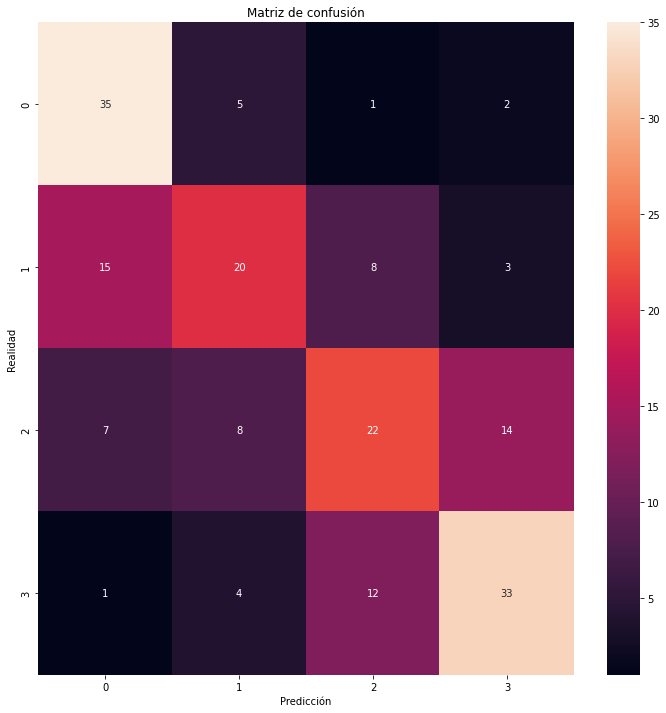


              precision    recall  f1-score   support

           0       0.60      0.81      0.69        43
           1       0.54      0.43      0.48        46
           2       0.51      0.43      0.47        51
           3       0.63      0.66      0.65        50

    accuracy                           0.58       190
   macro avg       0.57      0.59      0.57       190
weighted avg       0.57      0.58      0.57       190



In [ ]:
mostrar_resultados(y_test,y_pred_dtc_pca)

### Naive Bayes

In [ ]:
df_nb = df_original.drop(columns=['score', 'gross_total',])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_nb, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb= gnb.predict(X_test)
score=gnb.score(X_test,y_test)
df_models_opening_week=df_models_opening_week.append({'name_model': 'Naive Bayes', 'score': round(score*100,2),'target': 'opening_weekend_gross'},ignore_index=True)

In [ ]:
prediccion(y_test,y_pred_gnb)

Validos:  89  / No validos:  101


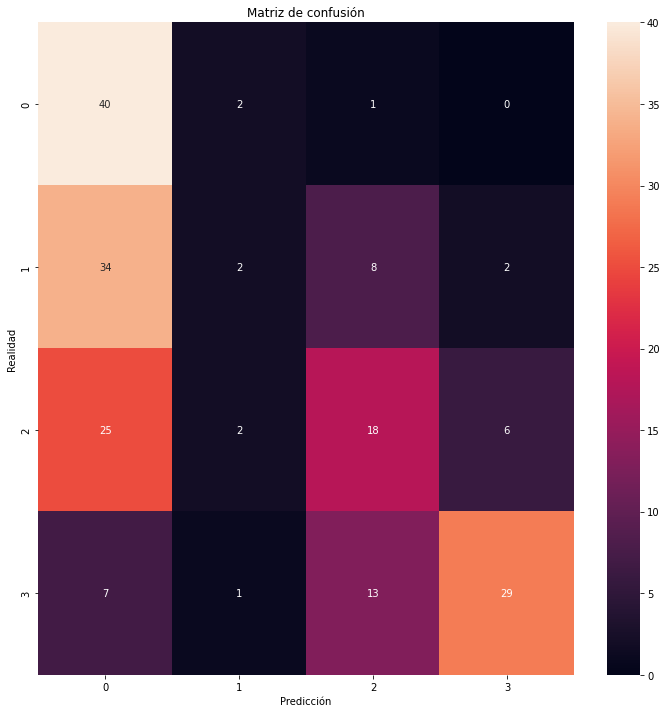


              precision    recall  f1-score   support

           0       0.38      0.93      0.54        43
           1       0.29      0.04      0.08        46
           2       0.45      0.35      0.40        51
           3       0.78      0.58      0.67        50

    accuracy                           0.47       190
   macro avg       0.47      0.48      0.42       190
weighted avg       0.48      0.47      0.42       190



In [ ]:
mostrar_resultados(y_test,y_pred_gnb)

### KNeighbors classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.utils import class_weight
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=4)
knc.fit(X_train, y_train)
y_pred_knc = knc.predict(X_test)
score = knc.score(X_test, y_test)
print(score)
df_models_opening_week=df_models_opening_week.append({'name_model': 'KNeighbors Classifier', 'score':round(score*100,2),'target': 'opening_weekened_gross'},ignore_index=True)

0.5473684210526316


In [ ]:
prediccion(y_test,y_pred_knc)

Validos:  104  / No validos:  86


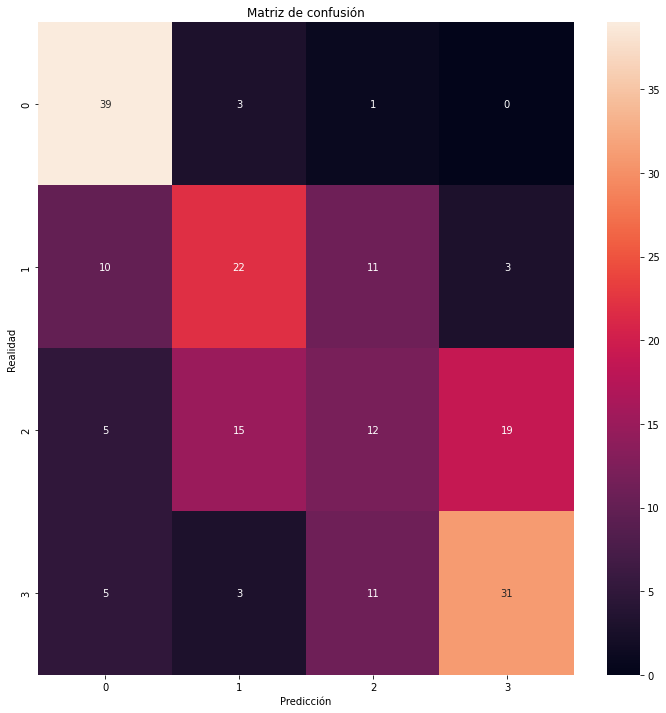


              precision    recall  f1-score   support

           0       0.66      0.91      0.76        43
           1       0.51      0.48      0.49        46
           2       0.34      0.24      0.28        51
           3       0.58      0.62      0.60        50

    accuracy                           0.55       190
   macro avg       0.53      0.56      0.54       190
weighted avg       0.52      0.55      0.53       190



In [ ]:
mostrar_resultados(y_test,y_pred_knc)

### Linear SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn import svm
lsvc = svm.SVC(kernel='poly')

In [ ]:
lsvc.fit(X_train,y_train)

SVC(kernel='poly')

In [ ]:
y_pred_lsvc=lsvc.predict(X_test)
score=lsvc.score(X_test,y_test)
df_models_opening_week=df_models_opening_week.append({'name_model': 'Linear SVC', 'score': round(score*100,2),'target': 'opening_weekend_gross'},ignore_index=True)

In [ ]:
prediccion(y_test,y_pred_lsvc)

Validos:  104  / No validos:  86


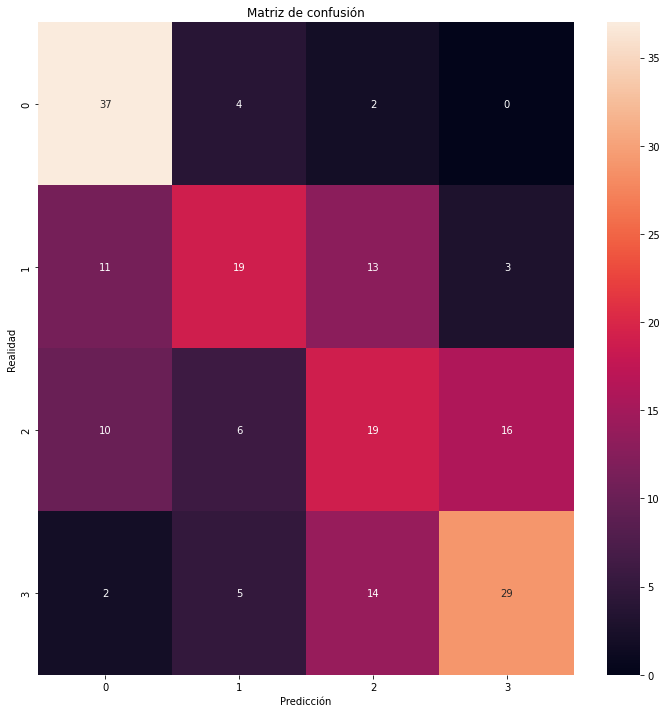


              precision    recall  f1-score   support

           0       0.62      0.86      0.72        43
           1       0.56      0.41      0.47        46
           2       0.40      0.37      0.38        51
           3       0.60      0.58      0.59        50

    accuracy                           0.55       190
   macro avg       0.54      0.56      0.54       190
weighted avg       0.54      0.55      0.54       190



In [ ]:
mostrar_resultados(y_test,y_pred_lsvc)

### Neural network

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers


In [ ]:
model = Sequential()
model.add(layers.Dense(30, input_dim = X_train.shape[1], activation = 'relu')) # input layer requires input_dim param
model.add(layers.Dense(15, activation = 'relu'))
model.add(layers.Dense(1, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 100, shuffle = True, batch_size=128, verbose=2)

Epoch 1/100
6/6 - 1s - loss: 0.0000e+00 - accuracy: 0.2074 - 802ms/epoch - 134ms/step
Epoch 2/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2074 - 17ms/epoch - 3ms/step
Epoch 3/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2074 - 18ms/epoch - 3ms/step
Epoch 4/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2074 - 20ms/epoch - 3ms/step
Epoch 5/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2074 - 24ms/epoch - 4ms/step
Epoch 6/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2074 - 21ms/epoch - 4ms/step
Epoch 7/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2074 - 20ms/epoch - 3ms/step
Epoch 8/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2074 - 22ms/epoch - 4ms/step
Epoch 9/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2074 - 19ms/epoch - 3ms/step
Epoch 10/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2074 - 21ms/epoch - 4ms/step
Epoch 11/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2074 - 19ms/epoch - 3ms/step
Epoch 12/100
6/6 - 0s - loss: 0.0000e+00 - accuracy: 0.2074 - 17ms/epoch - 3ms/ste

In [ ]:
score = model.evaluate(X_test, y_test)
score=score[1]
df_models_opening_week=df_models_opening_week.append({'name_model': 'Neural network Classification', 'score': round(score*100,2),'target': 'opening_weekend_gross'},ignore_index=True)

6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2421


In [ ]:
df_models_opening_week["score"]=df_models_opening_week["score"].astype(str)+"%"

### Results

In [ ]:
df_models_opening_week.to_csv("/content/df_ow.csv",index=False)#2012-2019

In [ ]:
df_models_opening_week#2000-2019

,name_model,score,target
0,Logistic Regression,62.16%,total_gross
1,Random Forest Classifier,61.26%,total_gross
2,Decision Tree Classifier,57.48%,total_gross
3,Decision Tree Classifier with PCA,53.69%,total_gross
4,Naive Bayes,43.96%,total_gross
5,KNeighbors Classifier,49.37%,total_gross
6,Linear SVC,56.76%,total_gross
7,Neural network Classification,25.95%,total_gross
